In [13]:
import pandas as pd
import matplotlib.pyplot as plt

In [97]:
# import oscars csv
df = pd.read_csv('the_oscar_award.csv')

In [61]:
#get max and min year_ceremony, year_film, ceremony

for i in ['year_ceremony', 'year_film', 'ceremony']:
    print(i, df[i].max(), df[i].min())

year_ceremony 2023 1928
year_film 2022 1927
ceremony 95 1


# Explorando o dataframe

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10765 entries, 0 to 10764
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year_film      10765 non-null  int64 
 1   year_ceremony  10765 non-null  int64 
 2   ceremony       10765 non-null  int64 
 3   category       10765 non-null  object
 4   name           10761 non-null  object
 5   film           10450 non-null  object
 6   winner         10765 non-null  bool  
dtypes: bool(1), int64(3), object(3)
memory usage: 515.3+ KB


In [194]:
df.head()

,year_film,year_ceremony,ceremony,category,name,film,winner,film_win,film_nomination
0,1927,1928,1,ACTOR,Richard Barthelmess,The Noose,False,NaN,1.0
1,1927,1928,1,ACTOR,Emil Jannings,The Last Command,True,1.0,2.0
2,1927,1928,1,ACTRESS,Louise Dresser,A Ship Comes In,False,NaN,1.0
3,1927,1928,1,ACTRESS,Janet Gaynor,7th Heaven,True,3.0,5.0
4,1927,1928,1,ACTRESS,Gloria Swanson,Sadie Thompson,False,NaN,1.0


In [90]:
df['category'].unique()

array(['ACTOR', 'ACTRESS', 'ART DIRECTION', 'CINEMATOGRAPHY',
       'DIRECTING (Comedy Picture)', 'DIRECTING (Dramatic Picture)',
       'ENGINEERING EFFECTS', 'OUTSTANDING PICTURE',
       'UNIQUE AND ARTISTIC PICTURE', 'WRITING (Adaptation)',
       'WRITING (Original Story)', 'WRITING (Title Writing)',
       'SPECIAL AWARD', 'DIRECTING', 'WRITING', 'OUTSTANDING PRODUCTION',
       'SOUND RECORDING', 'SHORT SUBJECT (Cartoon)',
       'SHORT SUBJECT (Comedy)', 'SHORT SUBJECT (Novelty)',
       'ASSISTANT DIRECTOR', 'FILM EDITING', 'MUSIC (Scoring)',
       'MUSIC (Song)', 'DANCE DIRECTION', 'WRITING (Screenplay)',
       'ACTOR IN A SUPPORTING ROLE', 'ACTRESS IN A SUPPORTING ROLE',
       'SHORT SUBJECT (Color)', 'SHORT SUBJECT (One-reel)',
       'SHORT SUBJECT (Two-reel)', 'IRVING G. THALBERG MEMORIAL AWARD',
       'MUSIC (Original Score)', 'CINEMATOGRAPHY (Black-and-White)',
       'CINEMATOGRAPHY (Color)', 'SPECIAL EFFECTS',
       'ART DIRECTION (Black-and-White)', 'ART DIRECT

In [30]:
df.isna().sum()

year_film          0
year_ceremony      0
ceremony           0
category           0
name               4
film             315
winner             0
dtype: int64

# Perguntas

## Pergunta 1

Existe alguma relação entre quantidade de vezes indicado e quantidade de vitorias?

In [105]:
#somar quantas vezes um filme ganhou 
df.groupby('film')['winner'].sum().sort_values(ascending=False)
df['film_win'] = df[df['winner'] == True].groupby('film')['film'].transform('count')

In [106]:
# somar quantas vezes um filme foi indicado
df['film_nomination'] = df.groupby('film')['film'].transform('count')

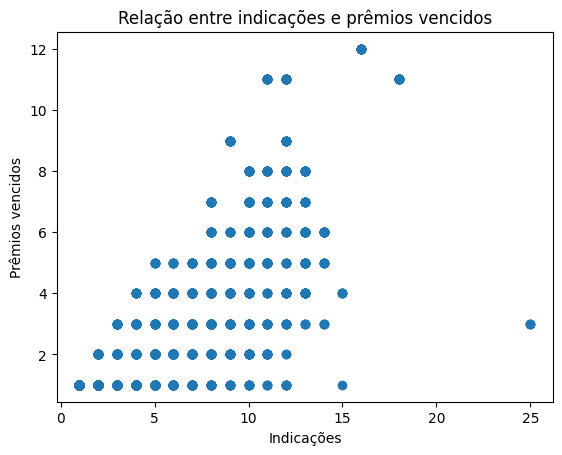

In [107]:
# relacionar quantas vezes o filme foi indicado com quantas vezes ele ganhou em um scatter plot
plt.scatter(df['film_nomination'], df['film_win'])
plt.title('Relação entre indicações e prêmios vencidos')
plt.xlabel('Indicações')
plt.ylabel('Prêmios vencidos')
plt.show()

In [108]:
# quem é o outlier
df[(df['film_nomination'] > 20) & (df['film_win'] < 5)][['film', 'film_nomination', 'film_win']].head(1)

,film,film_nomination,film_win
634,A Star Is Born,25.0,3.0


## Pergunta 2

Quais filmes que foram indicados a mais de duas vezes e que ganharam todas as categorias que concorriam?

In [193]:
# pegar os filmes que ganharam mais de 2 prêmios e que foram indicados mais de 2 vezes
winners = df[(df['film_nomination'] > 2) & (df['film_win'] == df['film_nomination'])][['film', 'year_ceremony', 'film_win', 'film_nomination']].drop_duplicates(subset='film').sort_values(by='film_win', ascending=False)
winners

,film,year_ceremony,film_win,film_nomination
8366,The Lord of the Rings: The Return of the King,2004,11.0,11.0
3385,Gigi,1959,9.0,9.0
6598,The Last Emperor,1988,9.0,9.0
266,It Happened One Night,1935,5.0,5.0
5224,The Great Gatsby,1975,4.0,4.0
7948,The Matrix,2000,4.0,4.0
4393,Grand Prix,1967,3.0,3.0
7305,Jurassic Park,1994,3.0,3.0
8843,The Bourne Ultimatum,2008,3.0,3.0
10521,CODA,2022,3.0,3.0


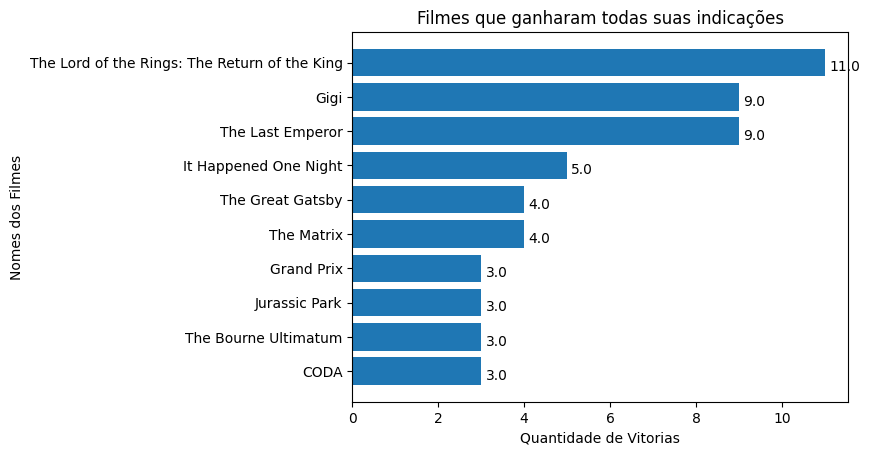

In [192]:
# graficar os filmes que ganharam todas suas indicações
plt.barh(winners['film'], winners['film_win'])
plt.ylabel("Nomes dos Filmes")
plt.xlabel("Quantidade de Vitorias")

# coloca o numero exato de vitorias ao lado da barra
for i, v in enumerate(winners['film_win']):
    plt.text(v + 0.1, i + .25, str(v))

plt.title("Filmes que ganharam todas suas indicações") 
plt.gca().invert_yaxis()
plt.show() 

## Pergunta 3

## Pergunta 4

## Pergunta 5